### Importing Libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

### Preprocessing the Data and Labelling

Combine all the datasets into one and label them according to the tree (CSV file) they belong to.



In [31]:

# Load the CSV files (replace with your actual file paths)
file_22 = pd.read_csv('22.csv')
file_23 = pd.read_csv('23.csv')
file_24 = pd.read_csv('24.csv')
file_25 = pd.read_csv('25.csv')
file_28 = pd.read_csv('28.csv')
file_29 = pd.read_csv('29.csv')
file_30 = pd.read_csv('30.csv')
file_34 = pd.read_csv('34.csv')
file_35 = pd.read_csv('35.csv')

# Label the data from each file
file_22['Label'] = 'Tree_22'
file_23['Label'] = 'Tree_23'
file_24['Label'] = 'Tree_24'
file_25['Label'] = 'Tree_25'
file_28['Label'] = 'Tree_28'
file_29['Label'] = 'Tree_29'
file_30['Label'] = 'Tree_30'
file_34['Label'] = 'Tree_34'
file_35['Label'] = 'Tree_35'
# Combine the datasets
combined_data = pd.concat([file_22, file_23, file_24,file_25,file_29,file_30,file_34,file_35], axis=0, ignore_index=True)

# Define the filename for saving the CSV
filename = 'Test_data_labelled.csv'

# Save the DataFrame to a CSV file
combined_data.to_csv(filename, index=False)

print(f"Labelled test data points saved to {filename}")

C:\Users\Shreya\AppData\Local\Temp\ipykernel_14600\2741925119.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  file_35 = pd.read_csv('35.csv')


Labelled test data points saved to Test_data_labelled.csv


### Feature Engineering
Use the coordinates (x, y, z) as features.

In [ ]:
# Splitting the data into features and labels
X = combined_data[['X', 'Y', 'Z']]
y = combined_data['Label']


### Model Training
Train a supervised classifier (Random Forest) to classify points based on their features.


Random Forest can manage high-dimensional data effectively without needing feature scaling, whereas KNN struggles with the curse of dimensionality.

Random Forest is faster and more efficient on large datasets during both training and prediction, while KNN can become slow and computationally expensive.

Random Forest is more robust to noise and overfitting due to its ensemble nature, while KNN is more sensitive to noisy data.

Random Forest generally provides higher accuracy, especially for complex, non-linear decision boundaries, compared to KNN.

Random Forest scales better with large datasets and is suitable for large-scale problems, whereas KNN does not scale as well.


In [32]:
# Splitting the data into features and labels
X = combined_data[['X', 'Y', 'Z']]
y = combined_data['Label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)


### Classification Report


Accuracy: 1.00
Cohen's Kappa: 1.00


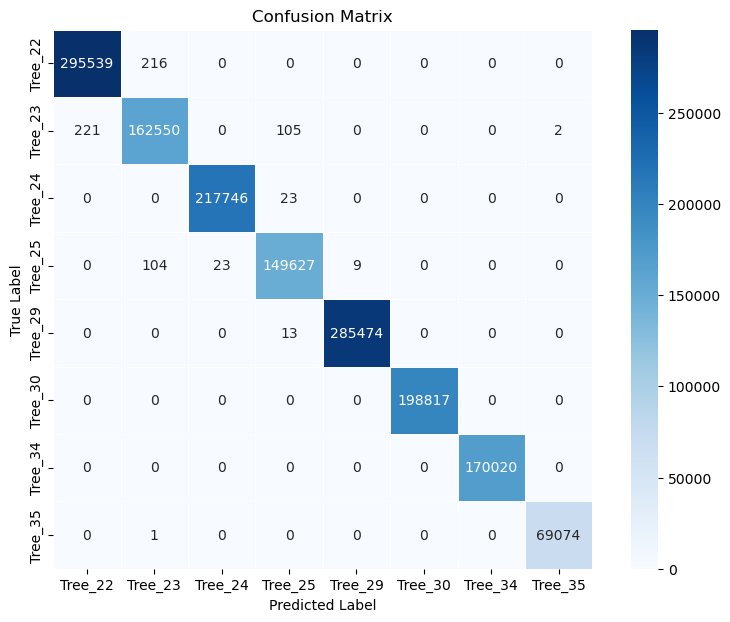


Classification Report:
              precision    recall  f1-score       support
Tree_22        0.999253  0.999270  0.999261  2.957550e+05
Tree_23        0.998029  0.997986  0.998008  1.628780e+05
Tree_24        0.999894  0.999894  0.999894  2.177690e+05
Tree_25        0.999059  0.999092  0.999075  1.497630e+05
Tree_29        0.999968  0.999954  0.999961  2.854870e+05
Tree_30        1.000000  1.000000  1.000000  1.988170e+05
Tree_34        1.000000  1.000000  1.000000  1.700200e+05
Tree_35        0.999971  0.999986  0.999978  6.907500e+04
accuracy       0.999537  0.999537  0.999537  9.995373e-01
macro avg      0.999522  0.999523  0.999522  1.549564e+06
weighted avg   0.999537  0.999537  0.999537  1.549564e+06


In [45]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=clf.classes_, columns=clf.classes_)
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.2f}")

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display classification report
print("\nClassification Report:")
print(class_report_df)


### Saving the Model

In [46]:
conf_matrix

array([[295539,    216,      0,      0,      0,      0,      0,      0],
       [   221, 162550,      0,    105,      0,      0,      0,      2],
       [     0,      0, 217746,     23,      0,      0,      0,      0],
       [     0,    104,     23, 149627,      9,      0,      0,      0],
       [     0,      0,      0,     13, 285474,      0,      0,      0],
       [     0,      0,      0,      0,      0, 198817,      0,      0],
       [     0,      0,      0,      0,      0,      0, 170020,      0],
       [     0,      1,      0,      0,      0,      0,      0,  69074]],
      dtype=int64)

In [2]:
import joblib

# Save the trained model to a file
model_filename = 'Tree_Classification_Model.pkl'
joblib.dump(clf, model_filename)
print(f"Model saved to {model_filename}")


Model saved to Tree_Classification_Model.pkl


### Labelling the segmented trees

In [3]:
# Load the segmented tree CSV files (replace with your actual file paths)
file_22s = pd.read_csv('22s.csv')
file_23s = pd.read_csv('23s.csv')
file_24s = pd.read_csv('24s.csv')
file_25s = pd.read_csv('25s.csv')
file_28s = pd.read_csv('28s.csv')
file_29s = pd.read_csv('29s.csv')
file_30s = pd.read_csv('30s.csv')
file_34s = pd.read_csv('34s.csv')
file_35s = pd.read_csv('35s.csv')

# Label the data from each file
file_22s['Label'] = 'Tree_22'
file_23s['Label'] = 'Tree_23'
file_24s['Label'] = 'Tree_24'
file_25s['Label'] = 'Tree_25'
file_28s['Label'] = 'Tree_28'
file_29s['Label'] = 'Tree_29'
file_30s['Label'] = 'Tree_30'
file_34s['Label'] = 'Tree_34'
file_35s['Label'] = 'Tree_35'
# Combine the datasets
combined_data = pd.concat([file_22, file_23, file_24,file_25,file_29,file_30,file_34,file_35], axis=0, ignore_index=True)

In [8]:
combined_data.iloc[:, :4] #displaying the labelled data


,X,Y,Z,Label
0,687171.8205,3394913.760,413.199005,Tree_22
1,687171.8132,3394913.768,413.201996,Tree_22
2,687171.8225,3394913.790,413.200500,Tree_22
3,687171.8363,3394913.755,413.199738,Tree_22
4,687171.8448,3394913.755,413.201508,Tree_22
...,...,...,...,...
5165207,687172.9978,3394912.030,406.783997,Tree_35
5165208,687173.0805,3394912.139,407.068237,Tree_35
5165209,687173.0092,3394912.007,407.131256,Tree_35
5165210,687173.0275,3394912.005,406.759247,Tree_35


### Applying the model

In [39]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Extract features for the segmented trees
X_segmented = combined_data[['X', 'Y', 'Z']]

# Make predictions on the new data
segmented_predictions = loaded_model.predict(X_segmented)

# Add predictions to the DataFrame
combined_data['Predicted_Label'] = segmented_predictions

# Identify misclassified points
misclassified_points = combined_data[combined_data['Label'] != combined_data['Predicted_Label']]

# Display the misclassified points
print("\nMisclassified Points:\n", misclassified_points.iloc[:, :4].head())


Misclassified Points:
                   X            Y           Z    Label
141913  687175.5235  3394913.513  410.289764  Tree_22
141914  687175.5210  3394913.514  410.295746  Tree_22
141922  687175.4978  3394913.528  410.282013  Tree_22
141929  687175.4895  3394913.534  410.304749  Tree_22
141947  687175.5247  3394913.521  410.324249  Tree_22


In [18]:
#Display the misclassified points with true and predicted labels
misclassified_points_display = misclassified_points[['X', 'Y', 'Z', 'Label', 'Predicted_Label']]

In [22]:
# Display the misclassified points
print("\nMisclassified Points:\n", misclassified_points_display.iloc[:, :5])


Misclassified Points:
                    X            Y           Z    Label Predicted_Label
141913   687175.5235  3394913.513  410.289764  Tree_22         Tree_23
141914   687175.5210  3394913.514  410.295746  Tree_22         Tree_23
141922   687175.4978  3394913.528  410.282013  Tree_22         Tree_23
141929   687175.4895  3394913.534  410.304749  Tree_22         Tree_23
141947   687175.5247  3394913.521  410.324249  Tree_22         Tree_23
...              ...          ...         ...      ...             ...
2874027  687179.0150  3394914.689  415.997986  Tree_29         Tree_25
2874386  687178.9780  3394914.691  415.981750  Tree_29         Tree_25
3537317  687179.0170  3394914.700  415.957764  Tree_29         Tree_25
3537318  687179.0088  3394914.715  415.966492  Tree_29         Tree_25
5105473  687173.8573  3394911.890  420.728760  Tree_35         Tree_23

[982 rows x 5 columns]


### Saving the misclassified points

In [24]:
# Get unique original labels
original_labels = misclassified_points_display['Predicted_Label'].unique()

# Save each DataFrame to a separate CSV file based on original labels
for Predicted_label in original_labels:
    label_df = misclassified_points_display[misclassified_points_display['Predicted_Label'] == Predicted_label]
    filename = f'misclassified_points_{Predicted_label}.csv'
    label_df.to_csv(filename, index=False)
    print(f"Saved misclassified points for label '{Predicted_label}' to {filename}")

Saved misclassified points for label 'Tree_23' to misclassified_points_Tree_23.csv
Saved misclassified points for label 'Tree_22' to misclassified_points_Tree_22.csv
Saved misclassified points for label 'Tree_35' to misclassified_points_Tree_35.csv
Saved misclassified points for label 'Tree_25' to misclassified_points_Tree_25.csv
Saved misclassified points for label 'Tree_29' to misclassified_points_Tree_29.csv
Saved misclassified points for label 'Tree_24' to misclassified_points_Tree_24.csv


In [28]:
# Define the filename for saving the CSV
filename = 'misclassified_points_display.csv'

# Save the DataFrame to a CSV file
misclassified_points_display.to_csv(filename, index=False)

print(f"Misclassified points saved to {filename}")

Misclassified points saved to misclassified_points_display.csv


### Analysis of the misclassified data

In [43]:
#Calculate the total count of each label in combined_data
total_labels = combined_data['Label'].value_counts().reset_index()
total_labels.columns = ['Label', 'Total_Count']

#Calculate the count of each misclassified label in misclassified_points
misclassified_labels = misclassified_points['Predicted_Label'].value_counts().reset_index()
misclassified_labels.columns = ['Label', 'Misclassified_Count']

# Merge the two DataFrames on 'Label'
label_data = pd.merge(total_labels, misclassified_labels, on='Label', how='left')
label_data['Misclassified_Count'] = label_data['Misclassified_Count'].fillna(0)

# Calculate the percentage of misclassified labels
label_data['Misclassified_Percentage'] = (label_data['Misclassified_Count'] / label_data['Total_Count']) * 100

# Calculate the percentage of misclassified labels
misclassified_percentage = (len(misclassified_points) / len(combined_data)) * 100

print('The total percentage of Misclassified lables are:',misclassified_percentage)

The total percentage of Misclassified lables are: 0.019011804355755387


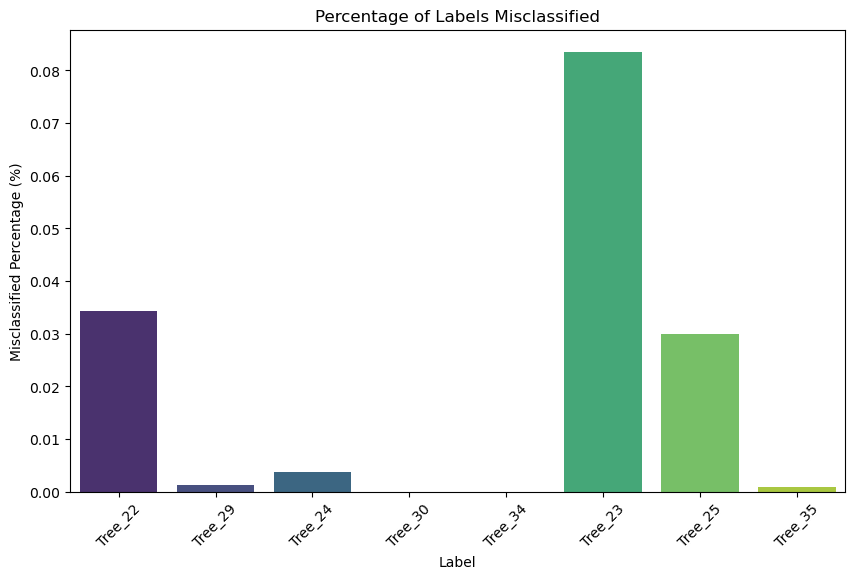

In [40]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=label_data, x='Label', y='Misclassified_Percentage', palette='viridis')
plt.title('Percentage of Labels Misclassified')
plt.xlabel('Label')
plt.ylabel('Misclassified Percentage (%)')
plt.xticks(rotation=45)
plt.show()
